### Проект Предобработка данных "Выдача кредитов"

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/data_preproc.csv')

df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


Описание данных

    children — количество детей в семье
    days_employed — общий трудовой стаж в днях
    dob_years — возраст клиента в годах
    education — уровень образования клиента
    education_id — идентификатор уровня образования
    family_status — семейное положение
    family_status_id — идентификатор семейного положения
    gender — пол клиента
    income_type — тип занятости
    debt — имел ли задолженность по возврату кредитов
    total_income — ежемесячный доход
    purpose — цель получения кредита

In [3]:
# ищем пропущенные значения в столбцах
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца income_type. 

In [4]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [5]:
# пропущенные значения в столбцах дней_работает и суммарный_доход
# найдем медианное значение для столбца total_income применительно к каждому типу(сотрудник, пенсионер и пр)

med_total_income_df = df.groupby('income_type').agg({'total_income': 'median'})\
.reset_index().rename(columns = {'total_income': 'median_total_income'})
med_total_income_df

,income_type,median_total_income
0,безработный,131339.751676
1,в декрете,53829.130729
2,госслужащий,150447.935283
3,компаньон,172357.950966
4,пенсионер,118514.486412
5,предприниматель,499163.144947
6,сотрудник,142594.396847
7,студент,98201.625314


In [6]:
med_total_income_df.income_type[1]

'в декрете'

In [7]:
med_total_income_df.median_total_income[1]

53829.13072905995

In [8]:
# напишем функцию замены пустых значений на медианное значение 
def fillna_total_income(df1, med_total_income_df):
    if df1.total_income.isna():
        df1.loc[df1.income_type == med_total_income_df.income_type, df1.total_income] = med_total_income_df.median_total_income
        

In [9]:
# промерджим основной датасет с датасетом медианных значений
df = df.merge(med_total_income_df, on='income_type', how='left')
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,median_total_income
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,142594.396847
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,142594.396847
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,142594.396847
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,142594.396847
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,118514.486412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем,172357.950966
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем,118514.486412
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость,142594.396847
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля,142594.396847


In [10]:
# заполняем пустые пропуски значением из столбца медианных суммарных доходов
df.total_income = df.total_income.fillna(df.median_total_income)

In [11]:
# проверяем все ли пропуски в столбце суммарный_доход заполнились
df.isnull().sum()

children                  0
days_employed          2174
dob_years                 0
education                 0
education_id              0
family_status             0
family_status_id          0
gender                    0
income_type               0
debt                      0
total_income              0
purpose                   0
median_total_income       0
dtype: int64

да, пропуски заполнены

In [12]:
# дропну вспомогательный столбец
df = df.drop('median_total_income', axis=1)

### Отступление на теорию: замена строковых типов на числовые

У метода  to_numeric() есть параметр errors. От значений, принимаемых errors,  зависят действия to_numeric при встрече с некорректным значением:

    `errors='raise' — дефолтное поведение: при встрече с некорректным значением выдаётся ошибка, операция перевода в числа прерывается;
    `errors='coerce' — некорректные значения принудительно заменяются на NaN;
    `errors='ignore' — некорректные значения игнорируются, но остаются.

Предпочтительно используем замену на NaN 

##### Формирование сводной таблицы PIVOT TABLE
data_pivot = data.pivot_table(index = ['column1', 'column2'], columns = 'source',
values = 'column_pivot', aggfunc = 'function')

    index - столбец или столбцы, по которым происходит группировка данных
    columns - столбец по значениям которого будет происходить группировка
    values - значения, по которым мы хотим увидеть сводную таблицу
    aggfunc - функция, которая будет применяться к значениям

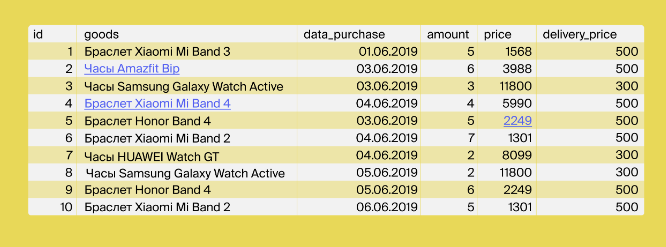

для это таблицы аргументами будут: 

- index — столбец или столбцы, по которым группируют данные (***название товара***)
- columns — столбец, по значениям которого происходит группировка (***даты***)
- values — значения, по которым мы хотим увидеть сводную таблицу (****количество проданного товара****)
- aggfunc — функция, применяемая к значениям (***сумма товаров***)

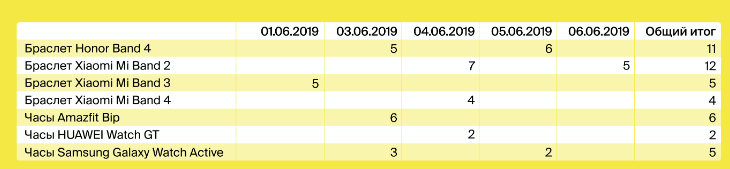

### Продолжаем проект


In [13]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце days_employed. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода abs()

In [14]:
df.days_employed = df.days_employed.abs()
df[df.days_employed <0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [15]:
data= df

data 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


Для каждого типа занятости выведите медианное значение трудового стажа days_employed в днях.

In [16]:
data.groupby('income_type').days_employed.median()

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

In [17]:
# удалим неадекватные значения в столбце children
data.children.unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [18]:
data = data[(data.children!= -1) & (data.children!= 20)]

In [19]:
data.children.unique()

array([1, 0, 3, 2, 4, 5])

In [20]:
# заполним пропуски в столбце days_employed медианными значениями по каждому типу занятости income_type
# слделаем это аналогично способу выше как для total_income:

median_days_emp_df = data.groupby('income_type').days_employed.median().reset_index().\
rename(columns={'days_employed':'median_days'})




In [21]:
median_days_emp_df

,income_type,median_days
0,безработный,366413.652744
1,в декрете,3296.759962
2,госслужащий,2689.137274
3,компаньон,1555.947387
4,пенсионер,365286.622650
5,предприниматель,520.848083
6,сотрудник,1572.328285
7,студент,578.751554


In [22]:
data = data.merge(median_days_emp_df, on= 'income_type', how='left')
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,median_days
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,1572.328285
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,1572.328285
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,1572.328285
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,1572.328285
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,365286.622650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21397,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем,1555.947387
21398,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем,365286.622650
21399,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость,1572.328285
21400,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля,1572.328285


In [23]:
data.days_employed = data.days_employed.fillna(data.median_days)

In [24]:
data = data.drop('median_days', axis=1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21401
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21402 non-null  int64  
 1   days_employed     21402 non-null  float64
 2   dob_years         21402 non-null  int64  
 3   education         21402 non-null  object 
 4   education_id      21402 non-null  int64  
 5   family_status     21402 non-null  object 
 6   family_status_id  21402 non-null  int64  
 7   gender            21402 non-null  object 
 8   income_type       21402 non-null  object 
 9   debt              21402 non-null  int64  
 10  total_income      21402 non-null  float64
 11  purpose           21402 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


In [26]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [27]:
# изменим тип данныйх в столбце доходов на int

data.total_income = data.total_income.astype(int)

In [28]:
# обработаем неявные дубликаты в столбце education 
data.education.unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [29]:
data.education = data.education.str.lower()

In [30]:
data.education.unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [31]:
# найдем и удалим дубликаты строк
data.duplicated().sum()

71

In [32]:
data = data.drop_duplicates()

Присвоим категории по доходам: от А до Е

In [33]:
def categorize_income(income):
    if income<=30000: res = 'E'
    elif income in range(30001,50001): res = 'D'
    elif income in range(50001,200001): res = 'C'
    elif income in range(200001, 1000001): res = 'B'
    elif income> 1_000_000: res = 'A'
    return res

In [34]:
data['total_income_category'] = data.total_income.apply(categorize_income)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C


Сформируем новый столбец purpose_category, в который войдут следующие категории:

    'операции с автомобилем',
    'операции с недвижимостью',
    'проведение свадьбы',
    'получение образования'.

In [35]:
data.purpose.unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [36]:
def categorize_purpose(purp):
    if 'автомоб' in purp: res = 'операции с автомобилем'
    elif 'недвижим' in purp or 'жиль' in purp: res = 'операции с недвижимостью'
    elif 'свадьб' in purp: res = 'проведение свадьбы'
    elif 'образова' in purp: res = 'получение образования'
    return res

In [37]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C


In [38]:
data['purpose_category'] = data.purpose.apply(categorize_purpose)
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


### Вторая часть - выводы

    1) Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [54]:
children_debt_df = data.groupby('children').agg({'debt': 'sum'}).reset_index()
children_debt_df

,children,debt
0,0,1063
1,1,444
2,2,194
3,3,27
4,4,4
5,5,0


In [78]:
ch_debt_corr = data.groupby('children').agg({'debt': 'sum',
                              'gender': 'count'}).reset_index().\
                              rename(columns= {'debt': 'num_debts', 'gender': 'num_types'})
ch_debt_corr

,children,num_debts,num_types
0,0,1063,14091
1,1,444,4808
2,2,194,2052
3,3,27,330
4,4,4,41
5,5,0,9


In [80]:
ch_debt_corr['share_of_debt']= round(ch_debt_corr.num_debts / ch_debt_corr.num_types *100, 2)
ch_debt_corr.sort_values('share_of_debt', ascending=False)

,children,num_debts,num_types,share_of_debts,share_of_debt
4,4,4,41,9.76,9.76
2,2,194,2052,9.45,9.45
1,1,444,4808,9.23,9.23
3,3,27,330,8.18,8.18
0,0,1063,14091,7.54,7.54
5,5,0,9,0.00,0.00


In [40]:
import seaborn as sns
# зададим размер графика для читабельности
sns.set(rc={'figure.figsize': (12,6)}) 

In [55]:
# строим scatter-plot корреляции между этими величинами
import plotly.express as px

px.scatter(children_debt_df, x = "children", y = "debt", trendline = "ols", trendline_color_override = "red")

In [81]:
# строим scatter-plot корреляции между этими величинами
import plotly.express as px

px.scatter(ch_debt_corr, x = "children", y = "share_of_debt", trendline = "ols", trendline_color_override = "red")

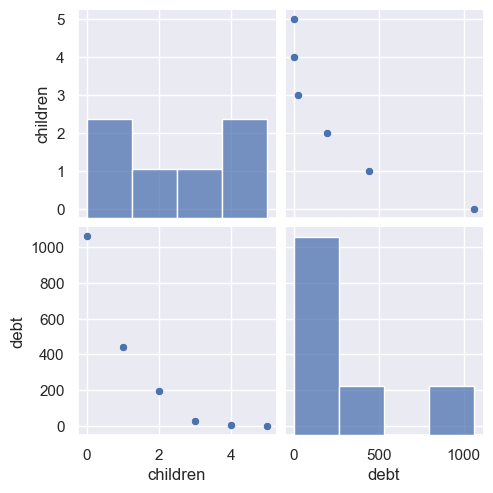

In [57]:
sns.pairplot(children_debt_df)

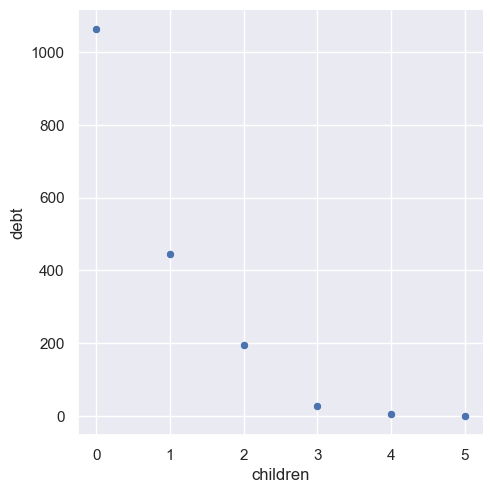

In [56]:
sns.pairplot(children_debt_df, 
                              x_vars='children',
                              y_vars='debt', height=5, aspect=1,
                              kind='scatter')


**Вывод:** 
Присутствует обратная корреляция: чем больше детей, тем ниже шанс задержки выплат/ задолженности по кредиту

    2) Есть ли зависимость между семейным положением и возвратом кредита в срок?    

In [71]:
# соберем количетсво задолженностей по каждому из статусов 
# + вычислим число представителей каждого из статусов семейного положения

famstatus_debt_df = data.groupby('family_status').\
    agg({'debt': 'sum',
         'gender':'count'}).reset_index().\
         rename(columns= {'gender': 'num_status', 'debt':'num_debts'})

famstatus_debt_df

,family_status,num_debts,num_status
0,Не женат / не замужем,273,2796
1,в разводе,84,1189
2,вдовец / вдова,63,951
3,гражданский брак,385,4134
4,женат / замужем,927,12261


In [76]:
# теперь вычислим долю задолженностей, приходящуюся на каждый из типов статусов
famstatus_debt_df['share_of_debt'] = round(famstatus_debt_df.num_debts / famstatus_debt_df.num_status *100, 2)
famstatus_debt_df.sort_values('share_of_debt', ascending=False)

,family_status,num_debts,num_status,share_of_debt
0,Не женат / не замужем,273,2796,9.76
3,гражданский брак,385,4134,9.31
4,женат / замужем,927,12261,7.56
1,в разводе,84,1189,7.06
2,вдовец / вдова,63,951,6.62


Получается, что: 
1) наибольший процент задолженностей встречается у холостых людей, никогда не бывших в браке и у людей, живущих в гражданском браке.
2) далее идут женатые и в разводе
3) и наконец минимальный риск задолженностей и долгов у вдов/вдовцов

<AxesSubplot: xlabel='family_status'>

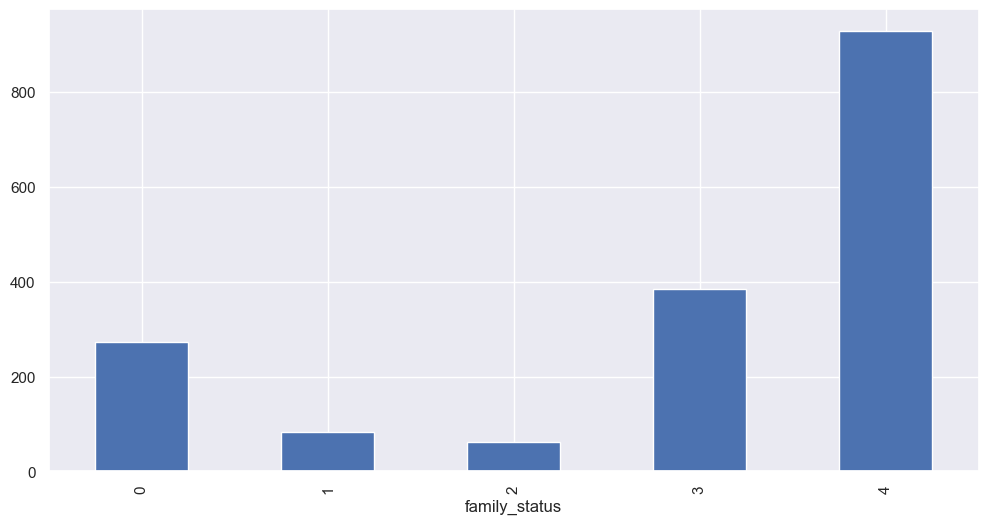

In [65]:
famstatus_debt_df.debt.plot(kind='bar', xlabel= 'family_status')

In [61]:
data.family_status.unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

    3) Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [85]:
# делаем все аналогично
tot_income_debt_corr = data.groupby('total_income_category').\
    agg({'debt': 'sum',
         'gender':'count'}).reset_index().\
         rename(columns= {'gender': 'num_status', 'debt':'num_debts'})

tot_income_debt_corr

,total_income_category,num_debts,num_status
0,A,2,25
1,B,354,5014
2,C,1353,15921
3,D,21,349
4,E,2,22


In [86]:
# теперь вычислим долю задолженностей, приходящуюся на каждый из типов доходов
tot_income_debt_corr['share_of_debt'] = round(tot_income_debt_corr.num_debts / tot_income_debt_corr.num_status *100, 2)
tot_income_debt_corr.sort_values('share_of_debt', ascending=False)

,total_income_category,num_debts,num_status,share_of_debt
4,E,2,22,9.09
2,C,1353,15921,8.50
0,A,2,25,8.00
1,B,354,5014,7.06
3,D,21,349,6.02


**Вывод** :
1) наибольший риск задолженности у людей с самым низким доходом (неудивительно)
2) однако, доход у среднего класса является вторым по риску формирования задолженности!
3) высокий доход и сверхдоход занимают средние позиции (видимо, статья расходов на погашение кредитов не является первоочередной для таких кредитополучателей)
4) ну и наиболее безопасными клиентами являются люди с небольшим доходом (от 30 до 50 т.р)

    4) Как разные цели кредита влияют на его возврат в срок?

In [88]:
purp_debt_corr = data.groupby('purpose_category').\
    agg({'debt': 'sum',
         'gender':'count'}).reset_index().\
         rename(columns= {'gender': 'num_status', 'debt':'num_debts'})

purp_debt_corr

,purpose_category,num_debts,num_status
0,операции с автомобилем,400,4279
1,операции с недвижимостью,780,10751
2,получение образования,369,3988
3,проведение свадьбы,183,2313


In [89]:
# теперь вычислим долю задолженностей, приходящуюся на каждый из типов целей 
purp_debt_corr['share_of_debt'] = round(purp_debt_corr.num_debts / purp_debt_corr.num_status *100, 2)
purp_debt_corr.sort_values('share_of_debt', ascending=False)

,purpose_category,num_debts,num_status,share_of_debt
0,операции с автомобилем,400,4279,9.35
2,получение образования,369,3988,9.25
3,проведение свадьбы,183,2313,7.91
1,операции с недвижимостью,780,10751,7.26


**Вывод**:
1) самые рискованные цели выдачи - автомобильные операции и образование
2) самые безопасные - свадьбы и недвижимость

    5) возможные причины появления пропусков в исходных данных: 

- некорректная работа в переносе данных с заполненных анкет (оператор)
- неполная информация от клиента (не знал как заполнить, не захотел давать информацию) - (клиент)
- сбой в работе базы данных и ошибки при выгрузке
- ситуация, когда заполнить нечего: например, у клиента нет детей и оператор в это поле не проставил ничего. тогда этот пропуск нужно заполнить аналитику, готовящему данные для анализа

    6) почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

количественные данные - неоднородны. они не подчиняются каким-то правилам заполнения и для различных клиентов могут быть абсолютно разными без каких-либо закономерностей.

Поэтому использование медианного значения будет более беспристрастным при заполнении пустот: на примере возрастов клиентов, относящихся к определенной группе (например, пенсионер):

- заполнить пустое значение средним арифметическим по возрасту всех людей нельзя, можно получить значение 20 лет и сделать пенсионера студентом
- заполнить пустое значение средним арифметическим по возрасту ТОЛЬКО группы пенсионеров тоже нельзя - возможен перекос из-за "выбросов" внутри этой выборки (1 или 2 чел будут сильно старше, чем все остальные и их возраст существенно повлияет на значение среднего арифметического)

В этом случае, медианное значение станет оптимальным - оно отсортирует список возрастов и выберет "серединное" значение (ровно по середине выборки).

### Общий вывод:



1) Мы собрали данные, разобрались с пропусками, заполнили их

2) выявили неявные пропуски, почистили и поправили неадекватные данные

3) Категоризировали данные по ЗП, по целям получения кредита для удобства использования их в анализе

4) выделили некоторые фичи, которые могут быть интересными при анализе целевой переменной (задолженность):

- статус семейного положения
- число детей
- категория дохода
- категория цели кредита

5) проанализировав несколько фичей (без использования ML) сделали первичные выводы относительно рисков формирования задолженности у определенных групп. Пока только по отдельности, без корреляции между величинами.


- - Следующим шагом можно проверить корреляцию между фичами и избавиться от тех, что сильно коррелируют между собой.
Возможно, выбрать только категориальные фичи и попробовать решить задачу классификации: поделить выборку на обучающие и тестовые данные, обучить модель типа descision_tree (или random_forest) и попробовать предсказать значения целевой переменной (задолженность). Результат сравнить с тестовой выборкой (посчитать accuracy, precision, recall) и на основании этого настроить модель для дальнейшего анализа новых данных для предсказания ожидаемого факта задолженности (да/нет)
